<a href="https://colab.research.google.com/github/hkchi-pham/study-it/blob/main/python/ml_training_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import torch
from google.colab import files
from sklearn.model_selection import train_test_split
uploaded = files.upload()
for filename in uploaded.keys():
    # Reading the CSV file
    df = pd.read_csv(filename)

df = df.drop(index=[8])
df = df.drop(index=[5])

X = df["x"].tolist()
Y = df["y"].tolist()

x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.2)

x_train = torch.tensor(x_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
x_val = torch.tensor(x_val,dtype=torch.float32)
y_val = torch.tensor(y_val,dtype=torch.float32)

x_train = x_train.unsqueeze(1)
x_val = x_val.unsqueeze(1)

y_train = y_train.unsqueeze(1)
y_val = y_val.unsqueeze(1)


x_train, y_train




Saving bai2.csv to bai2 (9).csv


(tensor([[ 7.],
         [ 4.],
         [ 0.],
         [ 1.],
         [ 6.],
         [10.],
         [ 9.],
         [ 9.],
         [ 2.],
         [ 5.]]),
 tensor([[-3.],
         [-1.],
         [ 3.],
         [ 3.],
         [-2.],
         [-5.],
         [-5.],
         [-5.],
         [ 1.],
         [-1.]]))

In [ ]:
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model.train()

for epoch in range(1000):
  optimizer.zero_grad()
  outputs = model(x_val)
  loss = criterion(outputs, y_val)
  loss.backward()
  optimizer.step()

  if epoch%100 == 0:
    print('epoch {}, loss {}'.format(epoch, loss.item()))


epoch 0, loss 3.7714669704437256
epoch 100, loss 0.8844742774963379
epoch 200, loss 0.23670752346515656
epoch 300, loss 0.07269839197397232
epoch 400, loss 0.0311724916100502
epoch 500, loss 0.020658599212765694
epoch 600, loss 0.017996491864323616
epoch 700, loss 0.017322516068816185
epoch 800, loss 0.017151862382888794
epoch 900, loss 0.017108656466007233


In [ ]:
model.eval()

with torch.no_grad():
  predicted = model(x_val)
  print(predicted, y_val)

tensor([[ 1.8691],
        [-4.0503],
        [ 0.1778]]) tensor([[ 2.],
        [-4.],
        [ 0.]])


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
x = x.to(device)
y = torch.tensor(y,dtype=torch.float32).to(device)

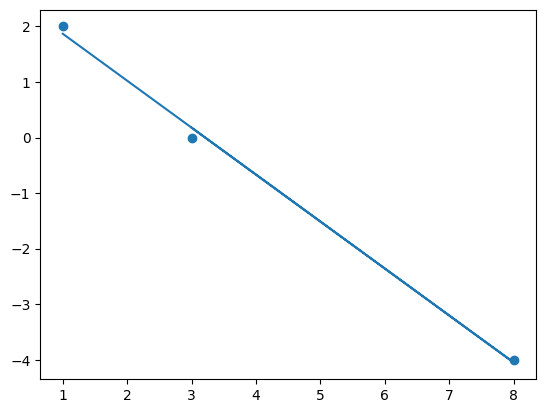

In [ ]:

y_val = y_val.numpy()

import matplotlib.pyplot as plt
plt.scatter(x_val, y_val, label='Original data')
plt.plot(x_val, predicted, label='Fitted line')
plt.show()

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import datetime

writer = SummaryWriter()

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

def train_model(n):
    for epoch in range(n):
        y1 = model(x)
        loss = criterion(y1, y)
        writer.add_scalar("Loss/train", loss, epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

train_model(10)
writer.flush()